In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2
import random
import glob
import re 
import Get_Data as get_data

### Classification of Handwritten Greek Letters Dataset:

In [2]:
X_train, Y_train, X_test, Y_test = get_data.get_data_tabular()

#### Training Data

In [3]:
print("Train Data Overview:")
print("X_train Shape:", X_train.shape)
print(X_train.info())
print("Y_train Shape:", Y_train.shape)
print(Y_train.info())

Train Data Overview:
X_train Shape: (240, 196)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Columns: 196 entries, 0 to 195
dtypes: float64(196)
memory usage: 367.6 KB
None
Y_train Shape: (240,)
<class 'pandas.core.series.Series'>
RangeIndex: 240 entries, 0 to 239
Series name: 196
Non-Null Count  Dtype  
--------------  -----  
240 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB
None


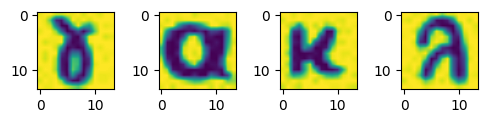

In [4]:
plt.figure(figsize=(6, 1))
for n, data in enumerate(X_train.sample(n=4, random_state=42).to_numpy()):
    ax = plt.subplot(1, 4, n+1)
    ax.imshow(data.reshape(14, 14), interpolation="bilinear")

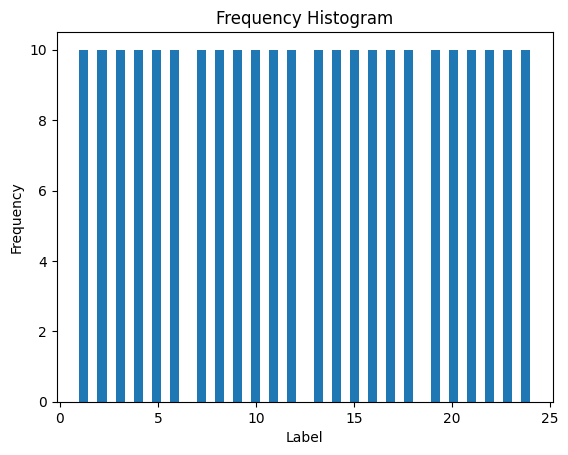

In [5]:
plt.hist(Y_train, bins=50)
plt.gca().set(title='Frequency Histogram', xlabel= 'Label', ylabel='Frequency');

In [6]:
Y_train.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])

#### Testing Data

In [7]:
print("Test Data Overview:")
print("X_train Shape:", X_test.shape)
print(X_test.info())
print("Y_train Shape:", Y_test.shape)
print(Y_test.info())

Test Data Overview:
X_train Shape: (96, 196)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Columns: 196 entries, 0 to 195
dtypes: float64(196)
memory usage: 147.1 KB
None
Y_train Shape: (96,)
<class 'pandas.core.series.Series'>
RangeIndex: 96 entries, 0 to 95
Series name: 196
Non-Null Count  Dtype  
--------------  -----  
96 non-null     float64
dtypes: float64(1)
memory usage: 896.0 bytes
None


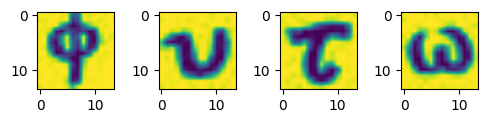

In [8]:
plt.figure(figsize=(6, 1))
for n, data in enumerate(X_test.sample(n=4, random_state=42).to_numpy()):
    ax = plt.subplot(1, 4, n+1)
    ax.imshow(data.reshape(14, 14), interpolation="bilinear")

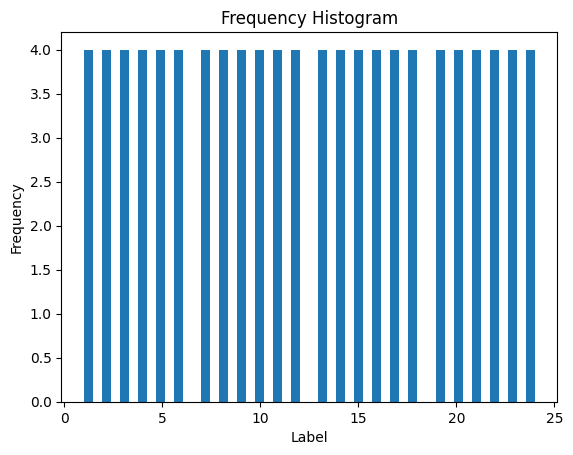

In [9]:
plt.hist(Y_test, bins=50)
plt.gca().set(title='Frequency Histogram', xlabel= 'Label', ylabel='Frequency');

### Handwritten Greek Characters from GCDB Dataset:

In [10]:
# Add your local path
path = "D:\Study\Final Project\Dataset\Final Datasets\GCDB\Query"
pattern = r'LETT_([A-Z]+)_NORM\.([A-Z]+)'

images = []
label = []
for folder in glob.glob(path + '\LETT_*_NORM.*') :
    match = re.search(pattern, folder)
    if match:
        temp_label = match.group(2).lower()
    for filename in glob.glob(folder +'\*.bmp'):
        image = cv2.imread(filename)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_image = cv2.resize(gray_image, (40, 40), interpolation=cv2.INTER_AREA)
        images.append(gray_image)
        label.append(temp_label)

data = pd.DataFrame(list(zip(images, label)), columns=["Image", "Label"])

uni_labels = pd.DataFrame({'Label': list(data.Label.unique()), 'Label_id': np.arange(1, 25)})

data = data.merge(uni_labels, how='left', on= 'Label')


In [11]:
print("Data Overview:")
print("Shape:", data.Image.shape)
print(data.info())

Data Overview:
Shape: (21473,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21473 entries, 0 to 21472
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Image     21473 non-null  object
 1   Label     21473 non-null  object
 2   Label_id  21473 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 419.5+ KB
None


In [12]:
data

,Image,Label,Label_id
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",alpha,1
1,"[[255, 255, 255, 255, 255, 255, 255, 28, 0, 0,...",alpha,1
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",alpha,1
3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",alpha,1
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",alpha,1
...,...,...,...
21468,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",zeta,24
21469,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",zeta,24
21470,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",zeta,24
21471,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",zeta,24


In [13]:
data['Image']

0        [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
1        [[255, 255, 255, 255, 255, 255, 255, 28, 0, 0,...
2        [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
3        [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
4        [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
                               ...                        
21468    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
21469    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
21470    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
21471    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
21472    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
Name: Image, Length: 21473, dtype: object

In [14]:
type(data)

pandas.core.frame.DataFrame

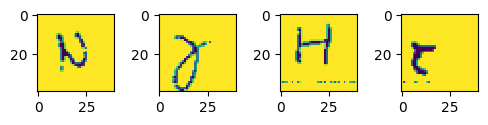

In [15]:
plt.figure(figsize=(6, 1))
for n, image in enumerate(data.sample(n=4, random_state=42).Image.to_numpy()):
    ax = plt.subplot(1, 4, n+1)
    ax.imshow(image, interpolation="nearest")

In [16]:
data.Label.value_counts()

Label
zeta       914
theta      913
mi         913
lamda      911
delta      910
beta       909
alpha      905
fi         905
psi        902
heta       902
pii        901
ro         901
xi         900
ni         896
gamma      893
sigma      888
epsilon    886
kapa       884
omega      883
tau        876
iota       876
ksi        875
ypsilon    870
omikron    860
Name: count, dtype: int64

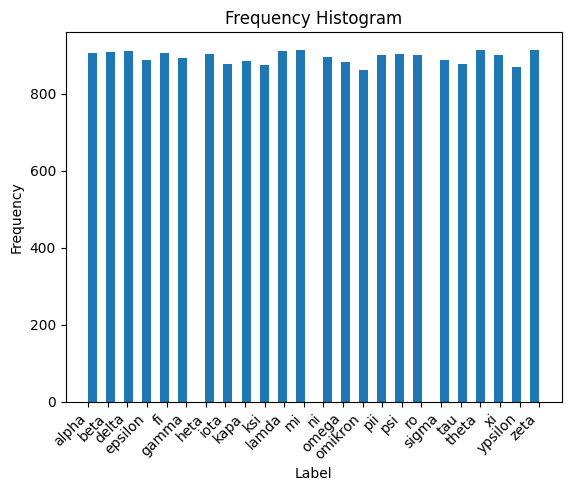

In [17]:
plt.hist(data.Label, bins=50)
plt.xticks(rotation=45, ha='right')
plt.gca().set(title='Frequency Histogram', xlabel= 'Label', ylabel='Frequency');